# Jane Chinwuko
# Batch number: DS2307

###  Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

### Columns Description:total 43 columns
#### Seat No : 
The enrolled number of candidate that took the exams

#### CGPA : 
The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
#### Predict - CGPA of a student based on different grades in four years.

# This project is a Regression problem.

In [1]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
#Load the dataset from the system
student_grade = pd.read_csv('Grades.csv')

## Exploratory Data Analysis

In [3]:
#Viewing the first 15 rows of the dataset
student_grade.head(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


We have both categorical and continuous variables in our dataset

In [4]:
#Viewing the last 15 rows of the dataset
student_grade.tail(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
556,CS-97557,A,B+,A+,A,A,B+,A-,B,A-,...,A,A-,A,B+,A,B,A,B+,A,3.624
557,CS-97558,B+,C+,B,A-,B-,B+,B+,C,B,...,C-,C,A-,C,C+,D+,B,C-,C,2.429
558,CS-97559,A-,B-,A,A,A-,A,B+,A-,B+,...,B+,B+,A,B,C,D,A-,D+,C,3.172
559,CS-97560,A-,C+,A,B,B,A-,C+,D,B,...,B+,B-,A,A-,A,C,B+,B+,A-,3.226
560,CS-97561,B+,C-,A,D+,C+,A-,C-,C+,C+,...,B+,C,B+,C-,C-,F,C,D,C-,2.370
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


We can see that there are NaN values in our dataset.

In [5]:
#Dropping the Seat No column 
student_grade.drop(columns=['Seat No.'],inplace=True)

We shall drop the Seat No column as it is not neccessary for the prediction of CGPA.

In [6]:
#Size of dataset
student_grade.shape

(571, 42)

This dataset contains 571 rows and 43 columns (made up of the independent and target variables)

In [7]:
#Viewing the columns present in the dataset
columns = student_grade.columns
columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

Two of the columns name does not follow the format AB-XXX.

In [8]:
#renaming the two columns to follow course code format
student_grade.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

We renamed the two columns having different format. The format for our course code is AB-XXX. We removed the / and number after it to make them uniform.

In [9]:
#Displays the basic information about the columns in the dataset
student_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    object 
 1   HS-101  571 non-null    object 
 2   CY-105  570 non-null    object 
 3   HS-105  570 non-null    object 
 4   MT-111  569 non-null    object 
 5   CS-105  571 non-null    object 
 6   CS-106  569 non-null    object 
 7   EL-102  569 non-null    object 
 8   EE-119  569 non-null    object 
 9   ME-107  569 non-null    object 
 10  CS-107  569 non-null    object 
 11  HS-205  566 non-null    object 
 12  MT-222  566 non-null    object 
 13  EE-222  564 non-null    object 
 14  MT-224  564 non-null    object 
 15  CS-210  564 non-null    object 
 16  CS-211  566 non-null    object 
 17  CS-203  566 non-null    object 
 18  CS-214  565 non-null    object 
 19  EE-217  565 non-null    object 
 20  CS-212  565 non-null    object 
 21  CS-215  565 non-null    object 
 22  MT

After dropping the Seat No column, we now have 571 entries in our dataset, 42 columns(1 float64 and 41 object). This is a regression problem because our target variable which is CGPA is a continuous variable.

In [10]:
#Displays the unique value for course code
student_grade['HS-304'].unique()

array(['C+', 'C-', 'A', 'B-', 'A-', 'B+', 'B', nan, 'C', 'D', 'D+', 'A+',
       'WU', 'F', 'W'], dtype=object)

We can see the different grade used. WU and W are not a known grading code. We will need to remove them; also remove NaN values.

In [11]:
#Displays the unique value for course code
student_grade['CS-203'].unique()

array(['D+', 'C', 'A', 'C+', 'A-', 'B+', 'B', 'B-', 'C-', nan, 'D', 'A+',
       'I', 'F'], dtype=object)

I is not a known grading code. We will need to remove them; also remove NaN values.

In [12]:
# viewing the counts of all columns in our dataset
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(student_grade)

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A

We can see that many columns have WU, W and I

In [13]:
# locating our columns with Wu I and W then drop them  
for grade in student_grade.columns:
    student_grade.drop(student_grade[(student_grade.loc[:,grade]=='WU')| (student_grade.loc[:,grade]=='I')| (student_grade.loc[:,grade]=='W')].index,inplace=True)

Since we do not have WU, W and I in our grading scale, we shall remove it from our dataset.

In [14]:
# viewing the counts of all columns in our dataset after removing WU, W and I
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(student_grade)

A-    112
A     110
B+     58
B      56
B-     53
D      37
C      31
C+     30
D+     22
A+     22
C-     15
F       1
Name: PH-121, dtype: int64


A-    80
B-    75
C     67
B     62
B+    58
C-    48
C+    45
D     40
A     38
D+    29
A+     4
F      1
Name: HS-101, dtype: int64


A     174
A-    117
B+     49
B      46
B-     39
A+     31
D      27
C      19
C-     16
C+     15
D+     14
Name: CY-105, dtype: int64


A     95
A-    71
B+    69
B     56
D     41
B-    39
C     37
C-    36
C+    36
A+    34
D+    33
Name: HS-105, dtype: int64


A-    104
A      99
B-     67
B+     61
B      52
C-     36
C+     33
C      28
D      23
A+     23
D+     19
F       1
Name: MT-111, dtype: int64


A     148
A-    133
B+     59
B      47
A+     42
B-     35
C+     22
C      20
C-     20
D+     14
D       7
Name: CS-105, dtype: int64


A-    113
B+    100
B      93
A      56
B-     49
C+     40
D+     28
C-     27
D      23
C      14
A+      4
Name: CS-106, dtype: int64


A-    102
A      92


We do not have WU, W and I in our dataset anymore

In [15]:
#checking for missing values
student_grade.isnull().sum()

PH-121     0
HS-101     0
CY-105     0
HS-105     0
MT-111     1
CS-105     0
CS-106     0
EL-102     1
EE-119     2
ME-107     1
CS-107     1
HS-205     1
MT-222     1
EE-222     1
MT-224     1
CS-210     1
CS-211     1
CS-203     1
CS-214     1
EE-217     1
CS-212     1
CS-215     1
MT-331     1
EF-303     2
HS-304     2
CS-301     2
CS-302     2
TC-383     2
MT-442     2
EL-332     1
CS-318     1
CS-306     1
CS-312     1
CS-317     2
CS-403     2
CS-421     3
CS-406    75
CS-414     3
CS-419     3
CS-423     4
CS-412    66
CGPA       0
dtype: int64

We can see that there are missing values in our dataset. We need to treat this before building our model.

In [16]:
def nanfill_with_modes(row):
    modes = row.mode()
    if len(modes) > 0:
        return row.fillna(modes[0])
    else:
        return row

student_grade_modes = student_grade.apply(nanfill_with_modes, axis=1)
student_grade_modes

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


We filled the missing values using the mode (most frequent) instead of removing the rows with the missing values.

In [17]:
#checking for missing values after filling with mode
student_grade_modes.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

We can see that all the null values have been filled.

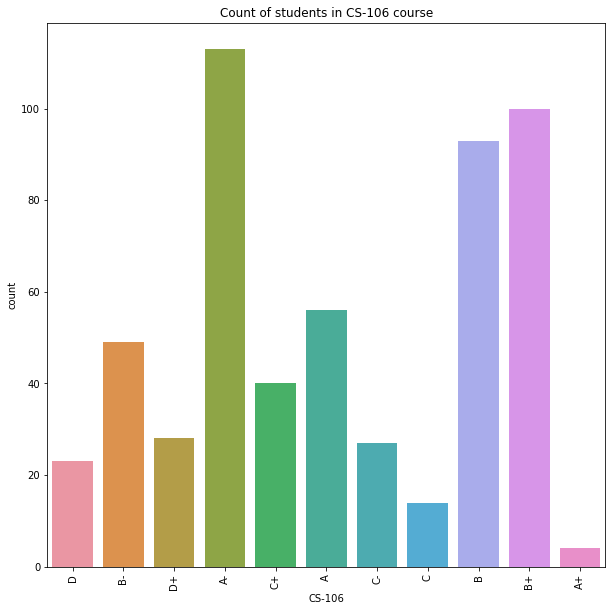

In [18]:
# countplot showing the students who attended the course CS-106
plt.figure(figsize=[10,10])
sns.countplot(x='CS-106', data=student_grade_modes)
plt.title('Count of students in CS-106 course')
plt.xticks(rotation = 90)
plt.show()

More student got A- in the course. Fewer students got A+

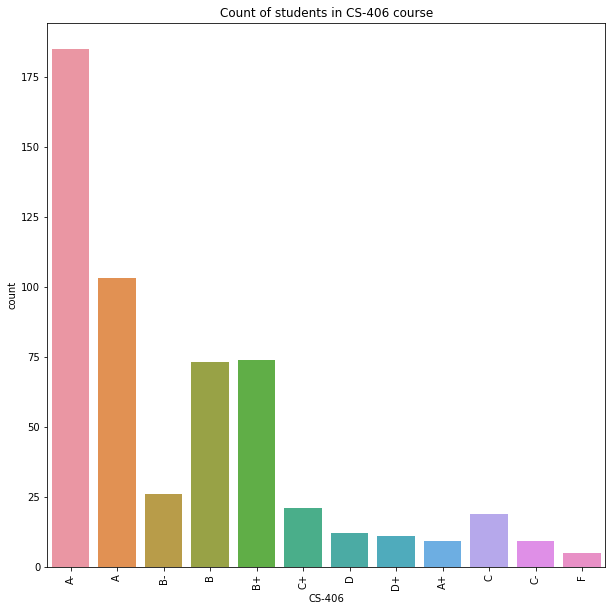

In [19]:
# countplot showing the students who attended the course CS-406
plt.figure(figsize=[10,10])
sns.countplot(x='CS-406', data=student_grade_modes)
plt.title('Count of students in CS-406 course')
plt.xticks(rotation = 90)
plt.show()

More student got A- in the course. Few students failed the course

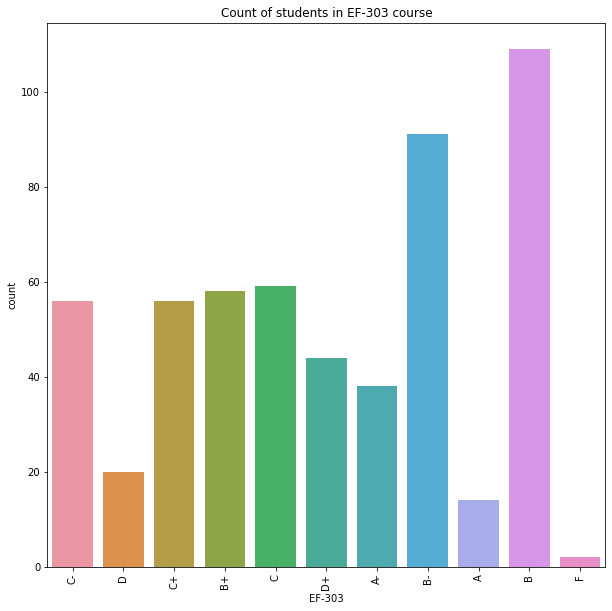

In [20]:
# countplot showing the students who attended the course EF-303
plt.figure(figsize=[10,10])
sns.countplot(x='EF-303', data=student_grade_modes)
plt.title('Count of students in EF-303 course')
plt.xticks(rotation = 90)
plt.show()

More student got a B in the course. Few students failed the course

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

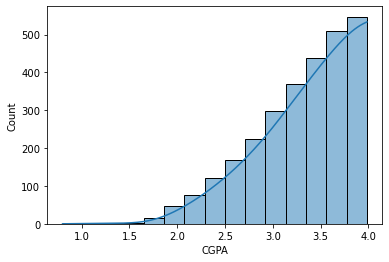

In [21]:
sns.histplot(student_grade_modes['CGPA'],cumulative=True, kde=True)

In [22]:
#converting our categorical values to numerical values using grading scale
for column in student_grade_modes.columns:    
    student_grade_modes[column]=student_grade_modes[column].replace('A+',4.0)
    student_grade_modes[column]=student_grade_modes[column].replace('A',4.0)
    student_grade_modes[column]=student_grade_modes[column].replace('A-',3.7)
    student_grade_modes[column]=student_grade_modes[column].replace('B+',3.3)
    student_grade_modes[column]=student_grade_modes[column].replace('B',3.0)
    student_grade_modes[column]=student_grade_modes[column].replace('B-',2.7)
    student_grade_modes[column]=student_grade_modes[column].replace('C+',2.3)
    student_grade_modes[column]=student_grade_modes[column].replace('C',2.0)
    student_grade_modes[column]=student_grade_modes[column].replace('C-',1.7)
    student_grade_modes[column]=student_grade_modes[column].replace('D+',1.3)
    student_grade_modes[column]=student_grade_modes[column].replace('D',1.0)
    student_grade_modes[column]=student_grade_modes[column].replace('F',0.0)

We need to convert our categorical values to numerical to enable us visualize our dataset and model a good model. We shall be using the point grading scale calculator found on this link https://images.app.goo.gl/CahzqSCfqoHQ2tuS8 to change the grades to numerical values.

In [23]:
#Viewing the first 10 rows of the dataset after scaling
student_grade_modes.head(15)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
5,4.0,2.7,3.0,1.3,2.3,3.7,2.3,3.0,3.3,3.3,...,2.0,2.7,2.3,2.3,3.7,3.7,3.3,2.7,3.0,3.026
6,2.7,1.7,3.7,1.0,3.7,3.0,4.0,3.3,3.7,3.3,...,2.7,2.0,3.3,2.7,4.0,3.7,3.3,3.3,4.0,2.957
7,3.3,3.3,2.3,2.0,2.0,3.7,1.7,3.7,3.0,3.7,...,1.3,3.3,3.3,2.0,4.0,3.3,3.7,3.7,3.7,3.043
8,3.7,2.0,3.7,1.3,3.0,3.7,3.7,3.7,3.3,3.7,...,3.3,3.0,2.7,2.3,4.0,3.7,3.3,3.7,4.0,3.358
9,4.0,3.0,2.3,3.0,3.0,3.7,2.0,2.7,3.7,4.0,...,2.3,2.7,3.3,2.7,4.0,4.0,3.7,3.0,4.0,3.247


Our values are now numerical

In [24]:
#displaying the descriptive statistics of all the features in the dataset
student_grade_modes.describe()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.0000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.047532,2.633821,3.295795,2.891408,3.021572,3.34936,2.970201,2.992505,3.025046,2.721024,...,2.946984,2.7117,3.106764,2.515174,3.279342,3.458867,3.018464,2.965448,3.217916,2.995388
std,0.944683,0.900554,0.881474,0.996247,0.906979,0.77732,0.834736,0.941357,0.815045,1.001014,...,1.031343,0.8580,0.877126,0.873149,0.787094,0.695228,0.741180,0.882924,0.784516,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.300000,3.00000,2.700000,2.300000,2.300000,2.000000,...,2.000000,2.0000,2.700000,2.000000,3.000000,3.300000,2.700000,2.300000,3.000000,2.587500
50%,3.300000,2.700000,3.700000,3.000000,3.300000,3.70000,3.000000,3.300000,3.300000,3.000000,...,3.300000,2.7000,3.300000,2.700000,3.700000,3.700000,3.000000,3.300000,3.300000,3.058000
75%,3.700000,3.300000,4.000000,3.700000,3.700000,4.00000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.3000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.0000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


We can see that our counts are now same after the missing values were filled.

Text(0.5, 1.0, 'Correlation Heatmap')

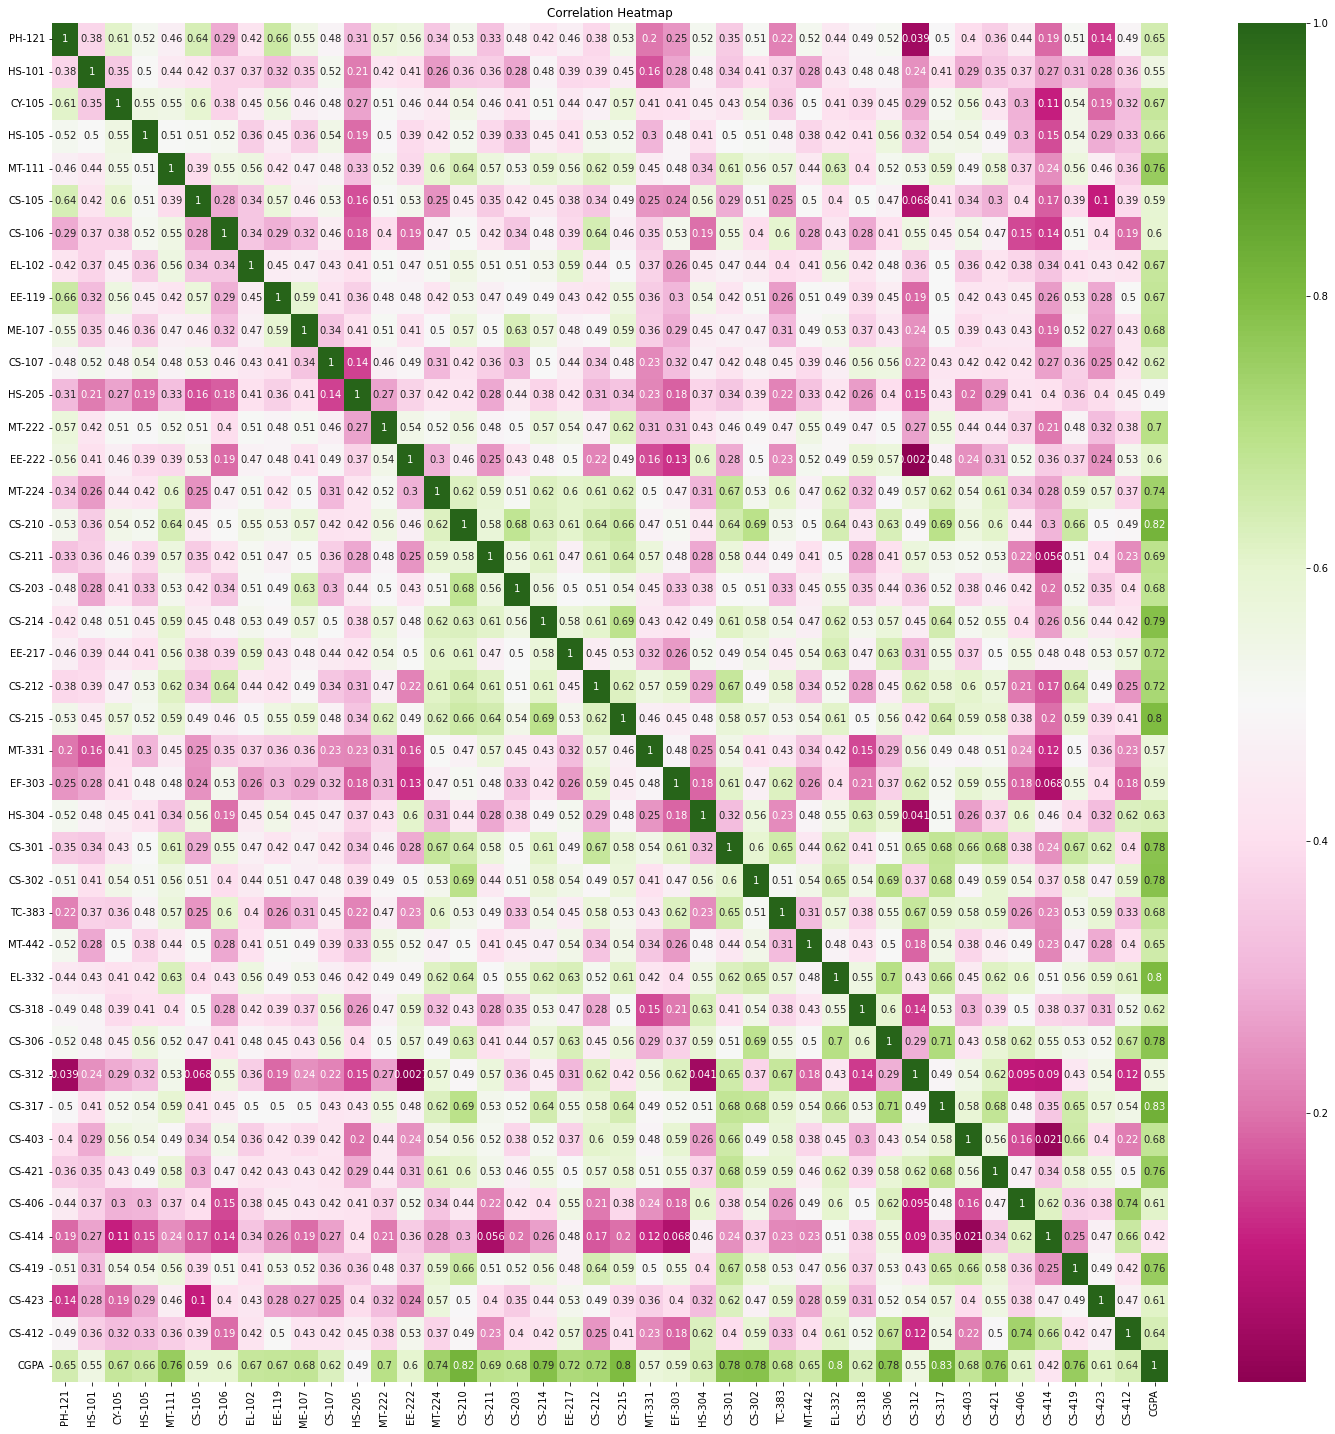

In [25]:
# Using heatmap to visualize the correlation between the features.
plt.figure(figsize=(25,25))
sns.heatmap(student_grade_modes.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')


We can see from the heatmap that the features are positively related with our target variable.

In [26]:
#checking for coorelation between features
student_grade_modes.corr() 

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.379784,0.608275,0.523806,0.463000,0.635525,0.286340,0.418094,0.658422,0.547942,...,0.038797,0.495004,0.398291,0.359452,0.443758,0.187424,0.513003,0.135413,0.487097,0.645032
HS-101,0.379784,1.000000,0.348177,0.502593,0.440643,0.418374,0.374039,0.374078,0.315093,0.352257,...,0.242492,0.406190,0.285553,0.345444,0.366993,0.272056,0.310500,0.282629,0.358235,0.554892
CY-105,0.608275,0.348177,1.000000,0.552309,0.547907,0.597531,0.375913,0.449548,0.559483,0.462745,...,0.286597,0.520816,0.564105,0.431082,0.296086,0.107337,0.540125,0.187746,0.318853,0.669994
HS-105,0.523806,0.502593,0.552309,1.000000,0.506335,0.511873,0.518329,0.358645,0.450435,0.357755,...,0.321766,0.536318,0.543187,0.487738,0.300188,0.154710,0.538580,0.289542,0.325455,0.657035
MT-111,0.463000,0.440643,0.547907,0.506335,1.000000,0.393435,0.551060,0.558420,0.420903,0.468783,...,0.532659,0.593875,0.490352,0.577834,0.365449,0.237174,0.562043,0.455152,0.359275,0.757257
CS-105,0.635525,0.418374,0.597531,0.511873,0.393435,1.000000,0.283239,0.338456,0.572053,0.455111,...,0.068381,0.410173,0.338594,0.296834,0.396873,0.174709,0.389268,0.101201,0.389883,0.591407
CS-106,0.286340,0.374039,0.375913,0.518329,0.551060,0.283239,1.000000,0.337750,0.293182,0.322958,...,0.552272,0.452019,0.535592,0.470352,0.150846,0.136241,0.509351,0.400632,0.191193,0.596871
EL-102,0.418094,0.374078,0.449548,0.358645,0.558420,0.338456,0.337750,1.000000,0.452029,0.467163,...,0.359340,0.499819,0.359912,0.415909,0.379100,0.335684,0.411248,0.429167,0.416946,0.669973
EE-119,0.658422,0.315093,0.559483,0.450435,0.420903,0.572053,0.293182,0.452029,1.000000,0.594416,...,0.186935,0.499839,0.421017,0.425006,0.446752,0.260075,0.530255,0.283022,0.503850,0.673246
ME-107,0.547942,0.352257,0.462745,0.357755,0.468783,0.455111,0.322958,0.467163,0.594416,1.000000,...,0.241393,0.497087,0.394229,0.433667,0.431781,0.191334,0.515084,0.273719,0.426708,0.677737


In [27]:
#This returns the count of unique occurrences in the CGPA column
student_grade_modes['CGPA'].value_counts()

3.019    5
2.793    3
2.206    3
3.772    3
2.756    3
        ..
2.042    1
2.634    1
2.053    1
3.585    1
1.753    1
Name: CGPA, Length: 470, dtype: int64

Five students had 3.019 CGPA

In [28]:
#This returns the maximum value in the CGPA column
student_grade_modes['CGPA'].max()

3.985

The highest CGPA is 3.985

In [29]:
#This returns the minimum value in the CGPA column
student_grade_modes['CGPA'].min()

0.8

The lowest CGPA is 0.8

In [30]:
# splitting our data into X(Independant variables) and y(target variable)
X = student_grade_modes.drop('CGPA',axis =1)#dropping the CGPA column and making it our target variable
y = student_grade_modes['CGPA']
X

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.0,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.7,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.3,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.3,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,3.3,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


# Model Building

In [31]:
from sklearn.model_selection import train_test_split
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410, 41), (137, 41), (410,), (137,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 75% of our data will be used to train the model while 25% will be used for model validation. We have 410 data in our training. 137 data will be used validation.

## 1. Random Forest Regressor

In [32]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_for= RandomForestRegressor()
random_for.fit(X_train, y_train)

y_pred = random_for.predict(X_test)
train_predrd = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.10057094890510937
mean_squared_error  :  0.021345252157664227
root_mean_absolute_error 0.1461001442766715
R2_score            :  0.9387900288700121
R2_score on training data :  0.9927636596103401




## 2. Gradient Boosting Regressor

In [33]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

ypred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')


mean_absolute_error :  0.08605648581984475
mean_squared_error  :  0.013091464954025663
root_mean_absolute_error 0.11441793982599784
R2_score            :  0.9624587151294235
R2_score on training data :  0.9978513039040864




## 3. AdaBoost Regressor

In [34]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)

ypredad = ad.predict(X_test)
train_predad = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypredad)
msqe = metrics.mean_squared_error(y_test, ypredad)
r2_score = metrics.r2_score(y_test, ypredad)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypredad))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predad))
print('\n')


mean_absolute_error :  0.12789369730696434
mean_squared_error  :  0.024934431336455752
root_mean_absolute_error 0.1579064005556955
R2_score            :  0.928497643833216
R2_score on training data :  0.9978513039040864




## 4. Ridge

In [35]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 0.5)
Ridge.fit(X_train, y_train)
ypred_rd = Ridge.predict(X_test)
train_predrd = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.025743024550040593
mean_squared_error  :  0.0029306356649096404
root_mean_absolute_error 0.054135345800222244
R2_score            :  0.9915960644026769
R2_score on training data :  0.9971162360057945




## 5. Linear Regression

In [36]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_regre = LinearRegression()
lin_regre.fit(X_train, y_train)
ypred_lr = lin_regre.predict(X_test)
train_predlr = lin_regre.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_lr)
msqe = metrics.mean_squared_error(y_test, ypred_lr)
r2_score = metrics.r2_score(y_test, ypred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_lr))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')

mean_absolute_error :  0.025821073157752745
mean_squared_error  :  0.002941193240744507
root_mean_absolute_error 0.05423276906764495
R2_score            :  0.9915657893369488
R2_score on training data :  0.9971163055291153




### Cross Validation Score for Random Forest Regressor

In [37]:
from sklearn.model_selection import cross_val_score
cv_score1 = cross_val_score(random_for,X,y, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,y_pred)- cv_score1.mean()}')

[0.9532006  0.9581912  0.96005293 0.95823428 0.93103953]
0.9521437086091227
The difference between the R2 score and the cross validation score is: -0.013353679739110613


### Cross Validation Score for Gradient Boosting Regressor

In [38]:

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb,X,y, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred)- cv_score.mean()}')

[0.96997431 0.96948747 0.95920305 0.97097535 0.95705139]
0.9653383148362945
The difference between the R2 score and the cross validation score is: -0.0028795997068710166


### Cross Validation Score AdaBoost Regressor

In [39]:
cv_score2 = cross_val_score(ad,X,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypredad)- cv_score2.mean()}')

[0.90341937 0.91456814 0.93252552 0.93546567 0.89183986]
0.9155637097996177
The difference between the R2 score and the cross validation score is: 0.012933934033598327


### Cross Validation Score for Ridge

In [40]:
cv_score4 = cross_val_score(Ridge,X,y, cv=5, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score4.mean()}')

[0.99511761 0.99700176 0.98553855 0.99686266 0.99515154]
0.993934424000616
The difference between the R2 score and the cross validation score is: -0.0023383595979391547


### Cross Validation Score for Linear Regression

In [41]:
cv_score3 = cross_val_score(lin_regre,X,y, cv=5, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_lr)- cv_score3.mean()}')

[0.99508926 0.9969943  0.98552457 0.99684502 0.99514484]
0.993919597541295
The difference between the R2 score and the cross validation score is: -0.002353808204346164


In [42]:
from sklearn.model_selection import GridSearchCV

model_best = RandomForestRegressor()

model_param = {'n_estimators':[10,100,200],
        'max_depth': [3, 5, 7, 10, 15],
        'max_features':[1,3,5,7],
        'min_samples_leaf': [3, 5, 10, 15, 20],
        'min_samples_split': [8, 10, 12, 18, 20, 16]
    }

In [43]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16],
                         'n_estimators': [10, 100, 200]})

In [44]:
#display the best parameters from the search
print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best max_features: " + str(gd_search.best_params_["max_features"]),
     "\nThe best min_samples_leaf: " + str(gd_search.best_params_["min_samples_leaf"]),
     "\nThe best min_samples_split: " + str(gd_search.best_params_["min_samples_split"]))

The best n_estimators is : 200 
The best max_depth: 10 
The best max_features: 5 
The best min_samples_leaf: 3 
The best min_samples_split: 8


In [45]:
# train the model with the selected parameters
New_model = RandomForestRegressor(n_estimators  = 200 , max_depth = 10, max_features =5 , min_samples_leaf = 3, min_samples_split = 8)

In [46]:
New_model.fit(X_train, y_train)

y_pred = New_model.predict(X_test)
train_predrd = New_model.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')


mean_absolute_error :  0.07907567067963509
mean_squared_error  :  0.012723597643119712
root_mean_absolute_error 0.11279892571793275
R2_score            :  0.9635136170492462
R2_score on training data :  0.9829811545184418




In [47]:
import pickle
# save the model to disk
filename = 'student_grade.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [48]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result

0.9635136170492462

In [49]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
Predicted,3.638161,3.592181,3.705873,3.74981,3.455099,2.847997,2.594331,2.557071,3.673178,2.480765,...,2.618175,2.990876,3.289475,2.267371,2.779451,3.094578,3.204971,3.413905,2.485171,2.445433
Original,3.736000,3.647000,3.707000,3.86100,3.621000,2.931000,2.311000,2.605000,3.696000,2.347000,...,2.636000,2.805000,3.335000,2.042000,2.711000,3.076000,3.174000,3.481000,2.406000,2.394000


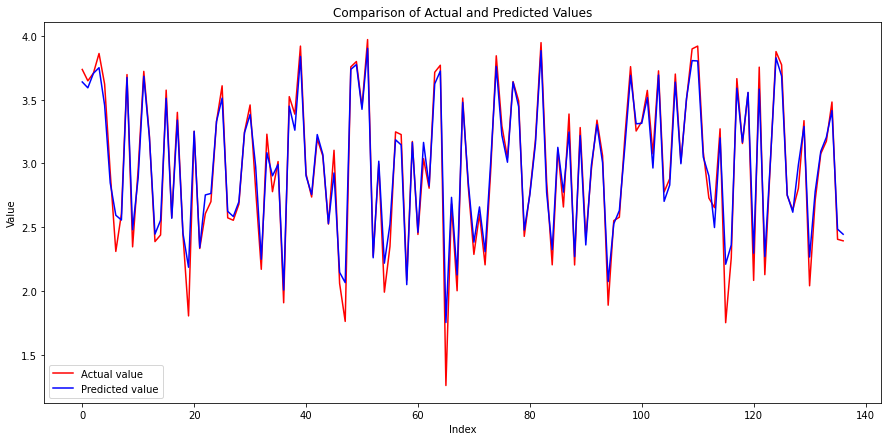

In [56]:
# Plotting both the Actual and Predicted values
plt.figure(figsize=[15,7])
plt.plot(x_values, y_test, color='r', label='Actual value') 
plt.plot(x_values, y_pred, color='b', label='Predicted value') 
  
# Name the x-axis, y-axis and the whole graph 
plt.xlabel("Index") 
plt.ylabel("Value") 
plt.title("Comparison of Actual and Predicted Values") 
  
# This helps to recognize each plot according to color 
plt.legend() 
  
# displays the plot 
plt.show() 

### Conclusion

We used different algorithms to train our data. From the difference between the r2 and cross validation scores obtained, we concluded that the Random Forest Regressor was the best model. We used the grid search algorithm to select the best parameters for our model and after training the model with the parameters, we observed an increase in the r2 score obtained (i.e From 0.9387900288700121 to 0.9635136170492462). From the graph above, we can see that the model is performing well as the predicted and original values are close.